In [1]:
import pandas as pd
import numpy as np #web attcks in these dataframes are less than 10000 hence we are randomly sampling the points here 
import numpy as np #converting the timestamp is int 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier#importing Random FOrest 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import eli5
from eli5.sklearn import PermutationImportance
from matplotlib import pyplot as plt  
import seaborn as sns

In [5]:
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress

Wednesday-14-02-201 100%[===================>] 341.63M  93.4MB/s    in 3.7s    
Thursday-15-02-2018 100%[===================>] 358.53M  99.3MB/s    in 3.7s    
Friday-16-02-2018_T 100%[===================>] 318.26M   100MB/s    in 3.2s    
Wednesday-21-02-201 100%[===================>] 313.66M  95.1MB/s    in 3.3s    
Thursday-22-02-2018 100%[===================>] 364.91M   101MB/s    in 3.7s    
Friday-23-02-2018_T 100%[===================>] 365.10M  78.1MB/s    in 4.7s    
Thursday-01-03-2018 100%[===================>] 102.85M  94.4MB/s    in 1.1s    
Friday-02-03-2018_T 100%[===================>] 336.04M  98.0MB/s    in 3.5s    


In [6]:
df1 = pd.read_csv('Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
df2=pd.read_csv('Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
df3=pd.read_csv('Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
df4=pd.read_csv('Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv')
df5=pd.read_csv('Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv')
df6=pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')
df7=pd.read_csv('Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
df8=pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

/tmp/ipykernel_6557/2366560560.py:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
/tmp/ipykernel_6557/2366560560.py:7: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df7=pd.read_csv('Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')


In [7]:
print('the shape of dataframe1',df1.shape) #reading the file shape for each data frames
print('the shape of dataframe2',df2.shape)
print('the shape of dataframe3',df3.shape)
print('the shape of dataframe4',df4.shape)
print('the shape of dataframe5',df5.shape)
print('the shape of dataframe6',df5.shape)
print('the shape of dataframe7',df7.shape)
print('the shape of dataframe8',df8.shape)

the shape of dataframe1 (1048575, 80)
the shape of dataframe2 (1048575, 80)
the shape of dataframe3 (1048575, 80)
the shape of dataframe4 (1048575, 80)
the shape of dataframe5 (1048575, 80)
the shape of dataframe6 (1048575, 80)
the shape of dataframe7 (331125, 80)
the shape of dataframe8 (1048575, 80)


****2) Counting the Unique types of DDOS attacks present in each Dataset

In [8]:
print('The Type and quantity of attach present in df1 \n',df1['Label'].value_counts() )

The Type and quantity of attach present in df1 
 Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


In [9]:
print('The Type and quantity of attach present in df2 \n ',df2['Label'].value_counts() )

The Type and quantity of attach present in df2 
  Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64


In [10]:
print('The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )

The Type and quantity of attach present in df3 
 Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: count, dtype: int64


In [11]:
df3.drop(df3.loc[df3['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account to any types of web attack, hence removing this
print('The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )

The Type and quantity of attach present in df3 
 Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64


In [12]:
print('The Type and quantity of attach present in df4 \n',df4['Label'].value_counts() )

The Type and quantity of attach present in df4 
 Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64


In [13]:
print('The Type and quantity of attach present in df5 \n',df5['Label'].value_counts() )

The Type and quantity of attach present in df5 
 Label
Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64


In [14]:
print('The Type and quantity of attach present in df6 \n',df6['Label'].value_counts() )

The Type and quantity of attach present in df6 
 Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64


In [15]:
print('The Type and quantity of attach present in df7 \n',df7['Label'].value_counts() )

The Type and quantity of attach present in df7 
 Label
Benign           238037
Infilteration     93063
Label                25
Name: count, dtype: int64


In [16]:
df7.drop(df7.loc[df7['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account for any type of DDOS attack, hence removing this

print('The Type and quantity of attach present in df3 \n',df7['Label'].value_counts() )

The Type and quantity of attach present in df3 
 Label
Benign           238037
Infilteration     93063
Name: count, dtype: int64


In [17]:
print('The Type and quantity of attach present in df8 \n',df8['Label'].value_counts() )

The Type and quantity of attach present in df8 
 Label
Benign    762384
Bot       286191
Name: count, dtype: int64


**3)Since the dataframa very huge to concatinate and load , using stratified sampling to sample data samples from the population on each dates dataframe**.

In [18]:
Strat_df1=df1.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df2=df2.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
Strat_df3=df3.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df1,df2,df3

print('The Stratified Sample of Dataset1 \n ', Strat_df1['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset2 \n ', Strat_df2['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset3 \n ', Strat_df3['Label'].value_counts())

The Stratified Sample of Dataset1 
  Label
Benign            10000
FTP-BruteForce    10000
SSH-Bruteforce    10000
Name: count, dtype: int64
The Stratified Sample of Dataset2 
  Label
Benign                   10000
DoS attacks-GoldenEye    10000
DoS attacks-Slowloris    10000
Name: count, dtype: int64
The Stratified Sample of Dataset3 
  Label
Benign                      10000
DoS attacks-Hulk            10000
DoS attacks-SlowHTTPTest    10000
Name: count, dtype: int64


In [19]:
N=10000
Strat_df4=df4.head(10000)
Strat_df5=df5.head(10000)
Strat_df6=df6.head(10000)
del df4,df5,df6


print('The Stratified Sample of Dataset4 \n ', Strat_df4['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset5 \n ', Strat_df5['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset6 \n ', Strat_df6['Label'].value_counts())

The Stratified Sample of Dataset4 
  Label
DDOS attack-HOIC        6070
Benign                  2200
DDOS attack-LOIC-UDP    1730
Name: count, dtype: int64
The Stratified Sample of Dataset5 
  Label
Benign              9638
Brute Force -Web     249
Brute Force -XSS      79
SQL Injection         34
Name: count, dtype: int64
The Stratified Sample of Dataset6 
  Label
Benign              9434
Brute Force -Web     362
Brute Force -XSS     151
SQL Injection         53
Name: count, dtype: int64


In [20]:
Strat_df7=df7.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df8=df8.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df7,df8

print('The Stratified Sample of Dataset7 \n ', Strat_df7['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset8 \n ', Strat_df8['Label'].value_counts())
print('='*100)

The Stratified Sample of Dataset7 
  Label
Benign           10000
Infilteration    10000
Name: count, dtype: int64
The Stratified Sample of Dataset8 
  Label
Benign    10000
Bot       10000
Name: count, dtype: int64


**4) Concatinating all the samples into a single final Dataframe**

In [21]:
final_dataset=pd.concat([Strat_df1,Strat_df2]) 
del Strat_df1,Strat_df2
final_dataset=pd.concat([final_dataset,Strat_df3])
del Strat_df3
final_dataset=pd.concat([final_dataset,Strat_df4])
del Strat_df4
final_dataset=pd.concat([final_dataset,Strat_df5])
del Strat_df5
final_dataset=pd.concat([final_dataset,Strat_df6])
del Strat_df6
final_dataset=pd.concat([final_dataset,Strat_df7])
del Strat_df7
final_dataset=pd.concat([final_dataset,Strat_df8])
del Strat_df8

In [22]:
pd.set_option('display.max_rows',None)
final_dataset[final_dataset.isnull().any(axis=1)]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1014470,51969,6,14/02/2018 02:33:18,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
542490,51239,6,14/02/2018 01:02:18,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
729111,49510,6,14/02/2018 08:34:04,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
815338,49793,6,14/02/2018 09:10:51,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
623368,50112,6,14/02/2018 10:48:36,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
423429,50421,6,14/02/2018 11:25:37,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
556882,50199,6,14/02/2018 10:25:16,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
904303,50462,6,14/02/2018 11:35:35,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1011299,50623,6,14/02/2018 11:15:20,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1030206,50371,6,14/02/2018 11:00:00,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [23]:
final_dataset.shape

(160000, 80)

In [24]:
final_dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1026195,3389,6,14/02/2018 09:16:29,2183061,8,7,1148,1581,677,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
857715,53,17,14/02/2018 10:15:43,2151,1,1,42,138,42,42,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1014159,0,0,14/02/2018 02:17:37,112639218,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319609.0,28.284271,56319629,56319589,Benign
422459,443,6,14/02/2018 02:16:35,119511503,156,248,5828,324386,958,0,...,20,343768.916667,1131166.510719,3935705,17117,9615521.666667,1355034.4666,10013843,5313073,Benign
843852,443,6,14/02/2018 08:41:11,109841020,11,8,580,5350,265,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [25]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [26]:
final_dataset['Label'].value_counts()

Label
Benign                      71272
FTP-BruteForce              10000
SSH-Bruteforce              10000
DoS attacks-GoldenEye       10000
DoS attacks-Slowloris       10000
DoS attacks-Hulk            10000
DoS attacks-SlowHTTPTest    10000
Bot                         10000
Infilteration               10000
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: count, dtype: int64

In [27]:
final_dataset.dtypes #Clearly all the numerical features are listing as object here, hence we should convert them into numerical category 

Dst Port             object
Protocol             object
Timestamp            object
Flow Duration        object
Tot Fwd Pkts         object
Tot Bwd Pkts         object
TotLen Fwd Pkts      object
TotLen Bwd Pkts      object
Fwd Pkt Len Max      object
Fwd Pkt Len Min      object
Fwd Pkt Len Mean     object
Fwd Pkt Len Std      object
Bwd Pkt Len Max      object
Bwd Pkt Len Min      object
Bwd Pkt Len Mean     object
Bwd Pkt Len Std      object
Flow Byts/s          object
Flow Pkts/s          object
Flow IAT Mean        object
Flow IAT Std         object
Flow IAT Max         object
Flow IAT Min         object
Fwd IAT Tot          object
Fwd IAT Mean         object
Fwd IAT Std          object
Fwd IAT Max          object
Fwd IAT Min          object
Bwd IAT Tot          object
Bwd IAT Mean         object
Bwd IAT Std          object
Bwd IAT Max          object
Bwd IAT Min          object
Fwd PSH Flags        object
Bwd PSH Flags        object
Fwd URG Flags        object
Bwd URG Flags       

In [28]:
final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)

/tmp/ipykernel_6557/3940923218.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)


In [29]:
#converting all the numerical features datatype from object to float
final_dataset = final_dataset.astype({'Dst Port': 'float', 'Protocol': 'float','Dst Port':'float', 'Protocol':'float', 'Timestamp':'float', 'Flow Duration':'float', 'Tot Fwd Pkts':'float',
'Tot Bwd Pkts':'float', 'TotLen Fwd Pkts':'float', 'TotLen Bwd Pkts':'float', 'Fwd Pkt Len Max':'float'})

final_dataset = final_dataset.astype({'Fwd Pkt Len Min':'float', 'Fwd Pkt Len Mean':'float', 'Fwd Pkt Len Std':'float','Bwd Pkt Len Max':'float', 'Bwd Pkt Len Min':'float', 'Bwd Pkt Len Mean':'float',
'Bwd Pkt Len Std':'float', 'Flow Byts/s':'float', 'Flow Pkts/s':'float', 'Flow IAT Mean':'float'})

final_dataset = final_dataset.astype({'Flow IAT Std':'float', 'Flow IAT Max':'float', 'Flow IAT Min':'float', 'Fwd IAT Tot':'float','Fwd IAT Mean':'float', 'Fwd IAT Std':'float', 'Fwd IAT Max':'float', 
'Fwd IAT Min':'float','Bwd IAT Tot':'float', 'Bwd IAT Mean':'float', 'Bwd IAT Std':'float', 'Bwd IAT Max':'float'})

In [30]:
final_dataset = final_dataset.astype({'Bwd IAT Min':'float', 'Fwd PSH Flags':'float', 'Bwd PSH Flags':'float', 'Fwd URG Flags':'float','Bwd URG Flags':'float', 'Fwd Header Len':'float', 'Bwd Header Len':'float',
'Fwd Pkts/s':'float','Bwd Pkts/s':'float', 'Pkt Len Min':'float', 'Pkt Len Max':'float', 'Pkt Len Mean':'float'})

final_dataset = final_dataset.astype({'Pkt Len Std':'float', 'Pkt Len Var':'float', 'FIN Flag Cnt':'float', 'SYN Flag Cnt':'float','RST Flag Cnt':'float', 'PSH Flag Cnt':'float', 'ACK Flag Cnt':'float', 
'URG Flag Cnt':'float','CWE Flag Count':'float', 'ECE Flag Cnt':'float', 'Down/Up Ratio':'float', 'Pkt Size Avg':'float'})

final_dataset = final_dataset.astype({'Fwd Seg Size Avg':'float', 'Bwd Seg Size Avg':'float', 'Fwd Byts/b Avg':'float','Fwd Pkts/b Avg':'float', 'Fwd Blk Rate Avg':'float', 'Bwd Byts/b Avg':'float',
'Bwd Pkts/b Avg':'float', 'Bwd Blk Rate Avg':'float', 'Subflow Fwd Pkts':'float','Subflow Fwd Byts':'float', 'Subflow Bwd Pkts':'float', 'Subflow Bwd Byts':'float'})


final_dataset = final_dataset.astype({'Init Fwd Win Byts':'float', 'Init Bwd Win Byts':'float', 'Fwd Act Data Pkts':'float','Fwd Seg Size Min':'float', 'Active Mean':'float', 'Active Std':'float', 'Active Max':'float',
'Active Min':'float', 'Idle Mean':'float', 'Idle Std':'float', 'Idle Max':'float', 'Idle Min':'float'})

In [31]:
pd.set_option('display.max_rows',None)
final_dataset.dtypes

Dst Port             float64
Protocol             float64
Timestamp            float64
Flow Duration        float64
Tot Fwd Pkts         float64
Tot Bwd Pkts         float64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags        float64
Bwd PSH Flags        float64
Fwd URG Flags 

In [32]:
constant_features=['Bwd PSH Flags','Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg']
#these contant features have been identified by using the SelectKBest sklearn library.
#these features just account to constant feature value of 0, which will not help in detucting the class label, hence removing them 
constant_features=final_dataset[constant_features]
constant_features.head()

,Bwd PSH Flags,Bwd URG Flags,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg
1026195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#these features just account to a constant  feature value of 0, which will not help in detucting the class label, hence removing them 

final_dataset.drop(['Bwd PSH Flags'],axis=1,inplace=True)
final_dataset.drop(['Bwd URG Flags'],axis=1,inplace=True)
final_dataset.drop(['Fwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Blk Rate Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Blk Rate Avg'],axis=1,inplace=True)

In [34]:
final_dataset.shape

(160000, 72)

In [35]:
# drop duplicate rows
final_dataset =  final_dataset.drop_duplicates(keep="first")

In [36]:
final_dataset.shape

(152346, 72)

In [37]:
final_dataset['Flow Byts/s']=final_dataset['Flow Byts/s'].replace([np.inf, -np.inf], np.nan) #These features contains Infinite values hence we are replacing them NaN values
final_dataset['Flow Pkts/s']=final_dataset['Flow Pkts/s'].replace([np.inf, -np.inf], np.nan)

In [38]:
#final_dataset.replace("Infinity", 0, inplace=True)
final_dataset=final_dataset.replace([np.inf, -np.inf], np.nan)

In [39]:
#final_dataset=final_dataset.replace(',,', np.nan, inplace=False) #replace blanks into NaN
#import numpy as np #converting the blank spaces into NaN values

final_dataset.replace(r'^\s*$', np.nan, regex=True)

In [40]:
final_dataset.shape

(152346, 72)

In [41]:
final_dataset.isnull().sum()

Dst Port               0
Protocol               0
Timestamp              0
Flow Duration          0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
TotLen Fwd Pkts        0
TotLen Bwd Pkts        0
Fwd Pkt Len Max        0
Fwd Pkt Len Min        0
Fwd Pkt Len Mean       0
Fwd Pkt Len Std        0
Bwd Pkt Len Max        0
Bwd Pkt Len Min        0
Bwd Pkt Len Mean       0
Bwd Pkt Len Std        0
Flow Byts/s          501
Flow Pkts/s          501
Flow IAT Mean          0
Flow IAT Std           0
Flow IAT Max           0
Flow IAT Min           0
Fwd IAT Tot            0
Fwd IAT Mean           0
Fwd IAT Std            0
Fwd IAT Max            0
Fwd IAT Min            0
Bwd IAT Tot            0
Bwd IAT Mean           0
Bwd IAT Std            0
Bwd IAT Max            0
Bwd IAT Min            0
Fwd PSH Flags          0
Fwd URG Flags          0
Fwd Header Len         0
Bwd Header Len         0
Fwd Pkts/s             0
Bwd Pkts/s             0
Pkt Len Min            0
Pkt Len Max            0


In [42]:
final_dataset=final_dataset.replace(np.nan, 0)

In [43]:
final_dataset.isnull().any() #Now we get no null features on these dataset

Dst Port             False
Protocol             False
Timestamp            False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s          False
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
Fwd URG Flags        False
Fwd Header Len       False
Bwd Header Len       False
Fwd Pkts/s           False
B

In [44]:
final_dataset.shape

(152346, 72)

**5) Doing Feature Importance test here to identify the important features to perform EDA on those features which contributes more to the target value.Applying one of the feature selection technique Permutation Importnance for this Classification task to identify the the important features required to obtain the target variable.**

In [45]:
y = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X = final_dataset.drop(['Label'],axis=1)

In [46]:
y.replace(to_replace=['Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS','SQL Injection'],value=0,inplace=True) #encoding the Anamalous and Normal values as 0 and 1 to visualize


In [47]:
y.replace(to_replace=['Benign'],value=1,inplace=True)

In [48]:
y.value_counts()

Label
0    81090
1    71256
Name: count, dtype: int64

In [49]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)#splitting the data set to apply randome Forest Algorith

In [50]:
train_y.dtypes

dtype('int64')

In [51]:
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X, train_y)
RF_pred=my_model.predict(val_X)
print('the accuracy',accuracy_score(val_y,RF_pred))

the accuracy 0.974978339065823


In [52]:
confusion_matrix(val_y,RF_pred)

array([[19594,   697],
       [  256, 17540]])

In [53]:
DT_clf = DecisionTreeClassifier(random_state=0)

DT_clf.fit(train_X, train_y)
DT_pred=DT_clf.predict(val_X)
print('the accuracy',accuracy_score(val_y,DT_pred))

the accuracy 0.9870822065271615


In [54]:
confusion_matrix(val_y,DT_pred)

array([[20035,   256],
       [  236, 17560]])

In [55]:
LR_clf = LogisticRegression(random_state=0)
LR_clf.fit(train_X, train_y)
LR_pred=LR_clf.predict(val_X)
print('the accuracy',accuracy_score(val_y,LR_pred))

the accuracy 0.5327539580434268


In [56]:
confusion_matrix(val_y,LR_pred)

array([[20291,     0],
       [17796,     0]])

In [57]:
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
features=[]
weights=eli5.show_weights(perm, feature_names = val_X.columns.tolist(),top=80)

In [58]:
type(weights)

IPython.core.display.HTML

In [59]:
#Dropping the bottom features with less feature Importance

final_dataset.drop(['Fwd IAT Std'],axis=1,inplace=True)
final_dataset.drop(['Subflow Fwd Byts'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Mean'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkt Len Min'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkt Len Mean'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Tot'],axis=1,inplace=True)
final_dataset.drop(['Flow Pkts/s'],axis=1,inplace=True)
final_dataset.drop(['Flow IAT Min'],axis=1,inplace=True)
final_dataset.drop(['TotLen Fwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['Flow Duration'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkts/s'],axis=1,inplace=True)
final_dataset.drop(['Flow Byts/s'],axis=1,inplace=True)


In [60]:
final_dataset.shape

(152346, 60)

In [61]:
final_dataset['Label'].value_counts()

Label
0    81090
1    71256
Name: count, dtype: int64

In [62]:
final_dataset.replace(to_replace=['Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS','SQL Injection'],value=0,inplace=True) #encoding the Anamalous and Normal values as 0 and 1 to visualize


In [63]:
final_dataset.replace(to_replace=['Benign'],value=1,inplace=True)
final_dataset['Label'].value_counts()

Label
0    81090
1    71256
Name: count, dtype: int64

In [64]:
#Seperating the Xi's and Yi's to compute corelation of the independent features 

Y_Labels = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X_data = final_dataset.drop(['Label'],axis=1)

**6) Identify the correlation between the variables and interpret by using the heatmap

The Highly correlated features can be removed from the dataframe as they can produce reduntant information to the model**

<Axes: >

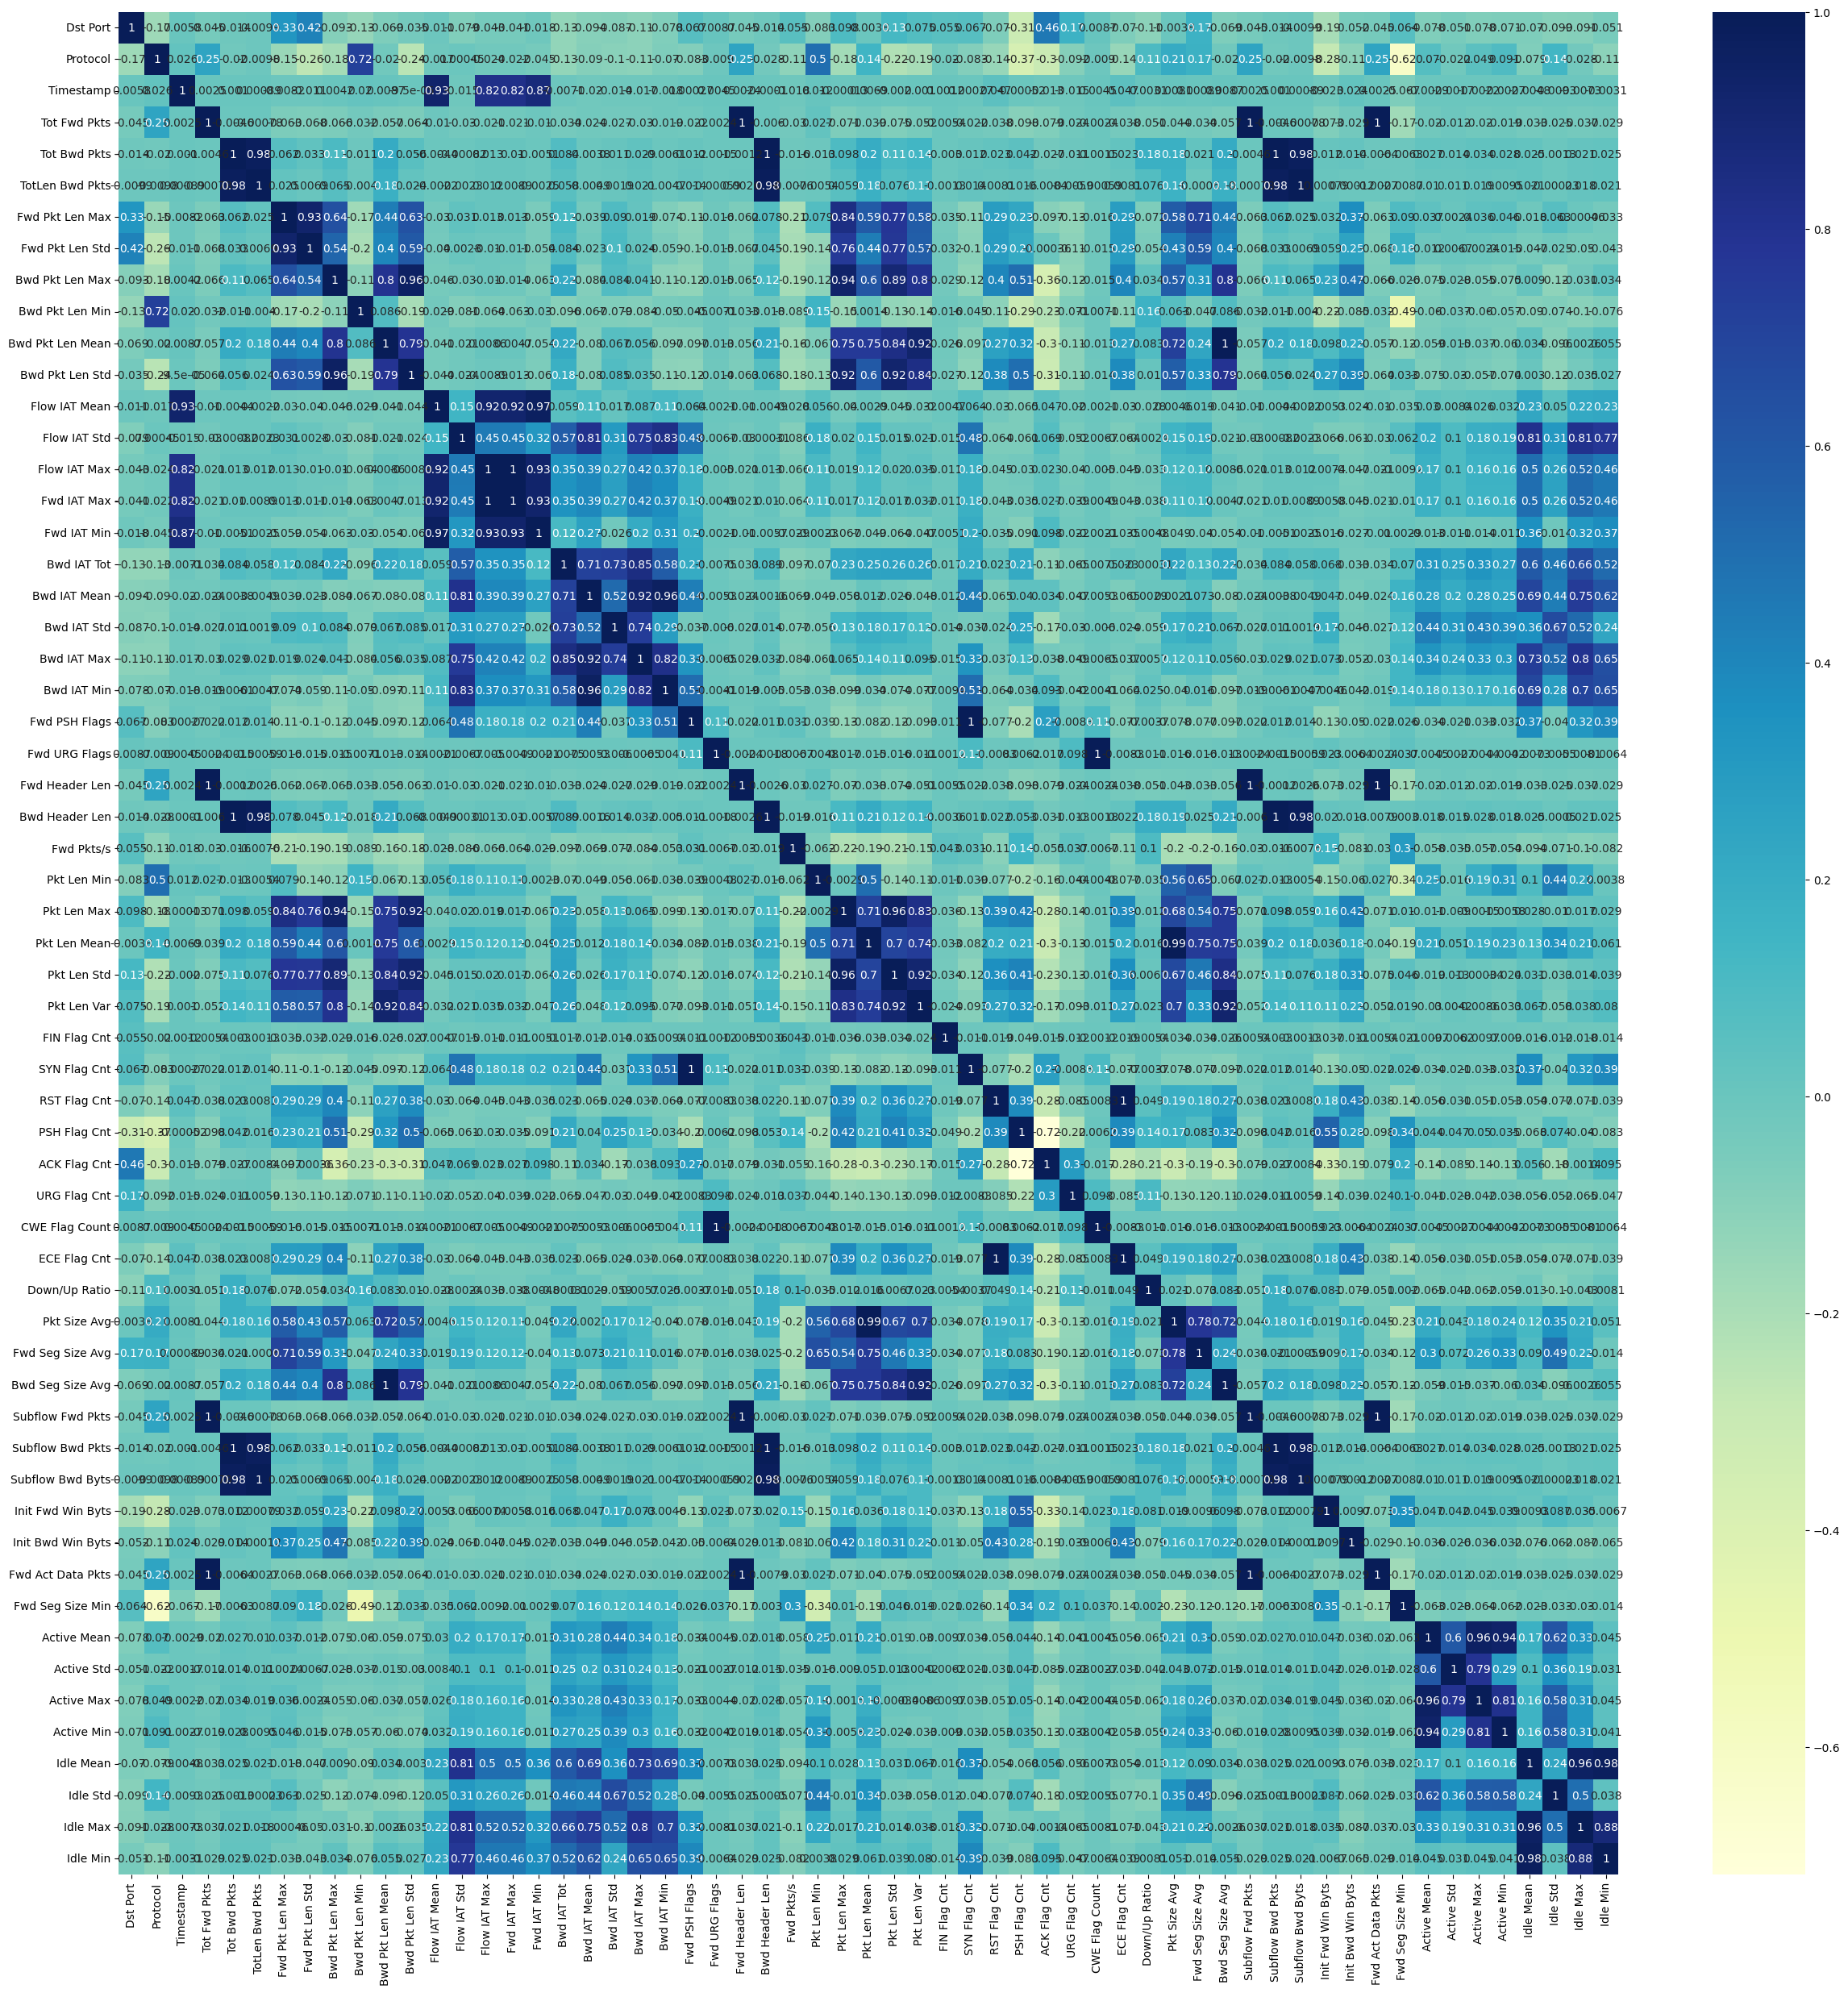

In [65]:
fig= plt.figure(figsize=(30,30))
sns.heatmap(X_data.corr(), annot=True,cmap="YlGnBu")

In [66]:
def get_correlation_high(X_data,threshold): #Findout the features with the correlation value greater the 0.85
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [67]:
def get_correlation_medium(X_data,threshold): #Findout the features with the correlation value greater the 0.85
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>=threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col 

In [68]:
corelated_features=get_correlation_medium(X_data,0.85)
corelated_features

{'Active Max',
 'Active Min',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Pkt Len Std',
 'Idle Max',
 'Idle Min',
 'Pkt Len Max',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts'}

In [69]:
corelated_features=get_correlation_high(X_data,0.95)
corelated_features

{'Active Max',
 'Bwd Header Len',
 'Bwd IAT Min',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Idle Max',
 'Idle Min',
 'Pkt Len Std',
 'Pkt Size Avg',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts'}

In [70]:
final_dataset.shape

(152346, 60)

In [71]:
final_dataset.drop(['Active Max'],axis=1,inplace=True) #Dropping the highly correlated features from the dataset
final_dataset.drop(['Bwd Header Len'],axis=1,inplace=True)
final_dataset.drop(['Bwd IAT Min'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkt Len Std'],axis=1,inplace=True)
final_dataset.drop(['Bwd Seg Size Avg'],axis=1,inplace=True)
final_dataset.drop(['CWE Flag Count'],axis=1,inplace=True)
final_dataset.drop(['ECE Flag Cnt'],axis=1,inplace=True)
final_dataset.drop(['Fwd Act Data Pkts'],axis=1,inplace=True)
final_dataset.drop(['Fwd Header Len'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Max'],axis=1,inplace=True)
final_dataset.drop(['Idle Max'],axis=1,inplace=True)
final_dataset.drop(['Idle Min'],axis=1,inplace=True)
final_dataset.drop(['Pkt Len Std'],axis=1,inplace=True)
final_dataset.drop(['Pkt Size Avg'],axis=1,inplace=True)
final_dataset.drop(['SYN Flag Cnt'],axis=1,inplace=True)
final_dataset.drop(['Subflow Bwd Byts'],axis=1,inplace=True)
final_dataset.drop(['Subflow Bwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['Subflow Fwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['TotLen Bwd Pkts'],axis=1,inplace=True)


In [72]:
final_dataset.shape

(152346, 41)

In [73]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')

In [74]:
final_dataset['Label'].value_counts()

Label
0    81090
1    71256
Name: count, dtype: int64

In [75]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')

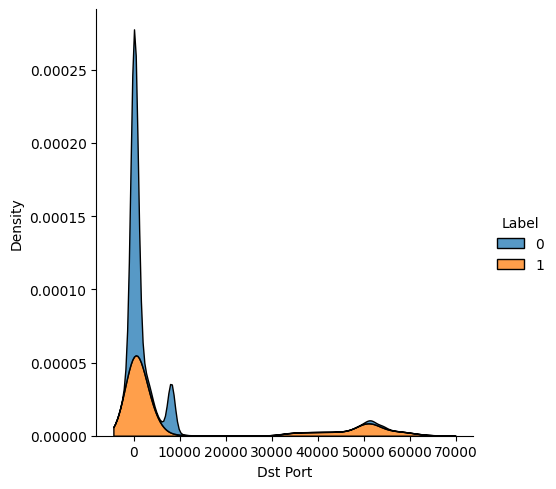

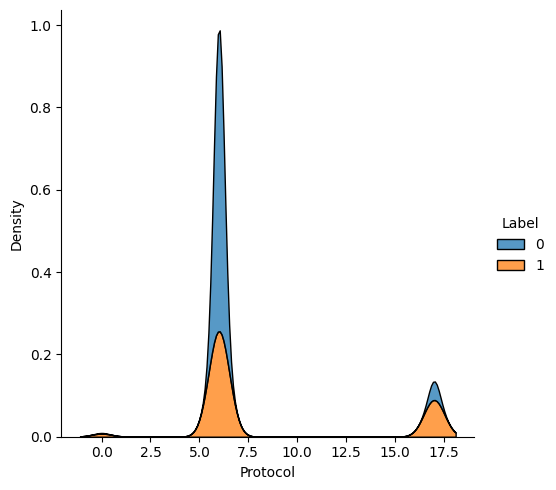

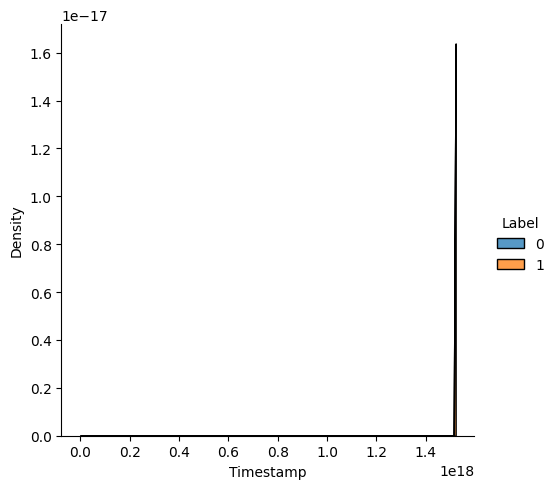

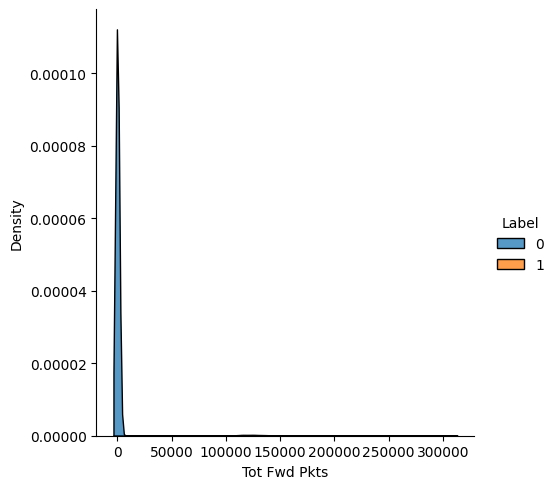

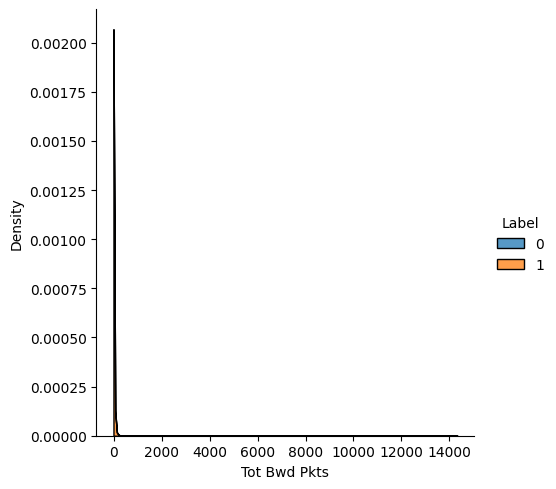

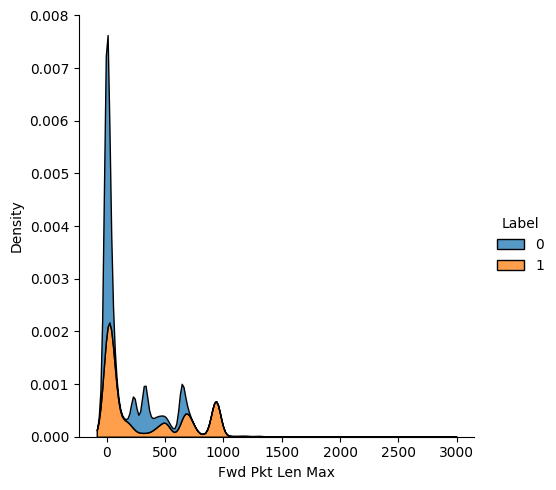

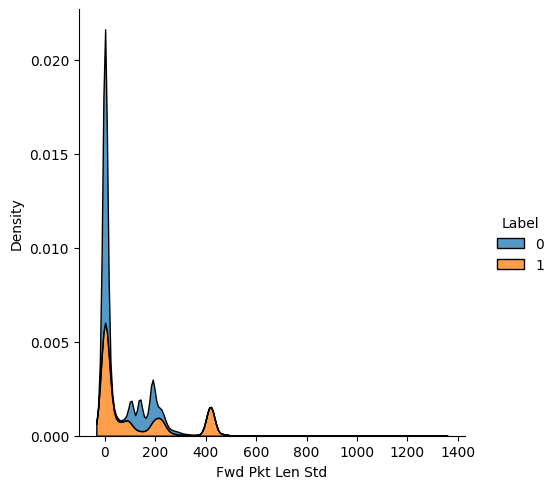

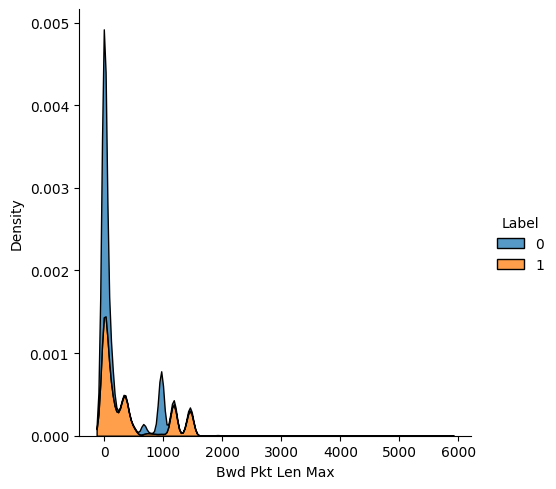

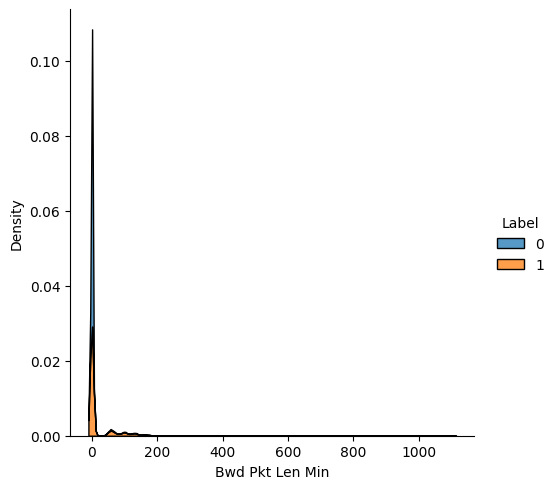

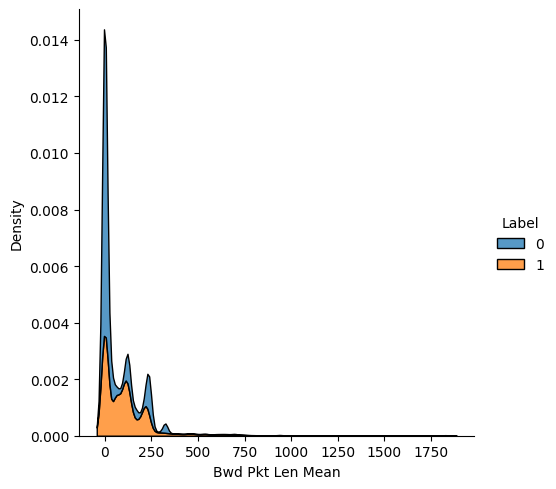

In [76]:
sns.displot(final_dataset, x="Dst Port", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Protocol", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Timestamp", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Tot Fwd Pkts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Tot Bwd Pkts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Pkt Len Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Mean", hue="Label", kind="kde", multiple="stack")

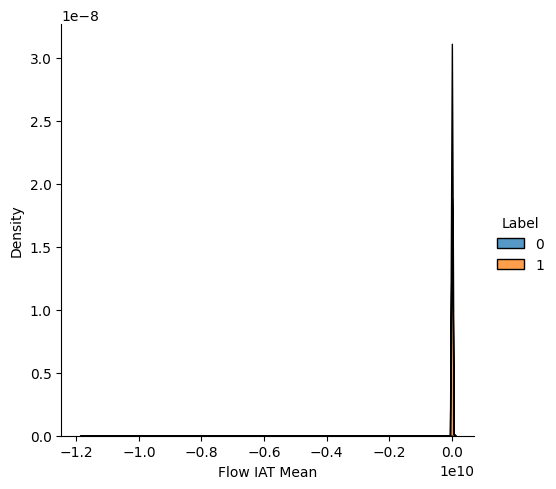

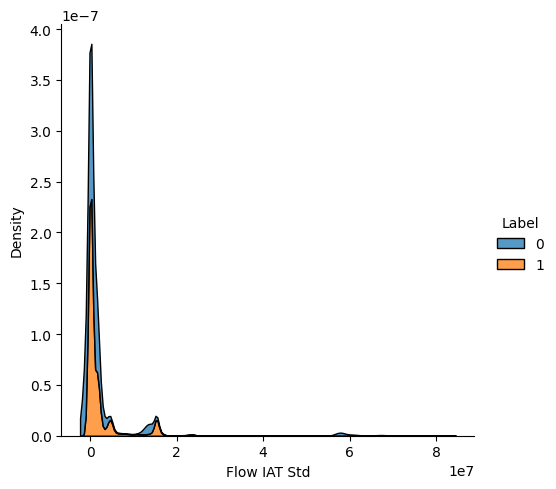

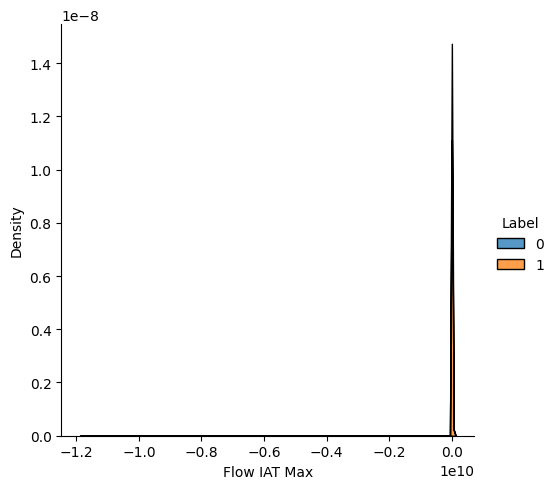

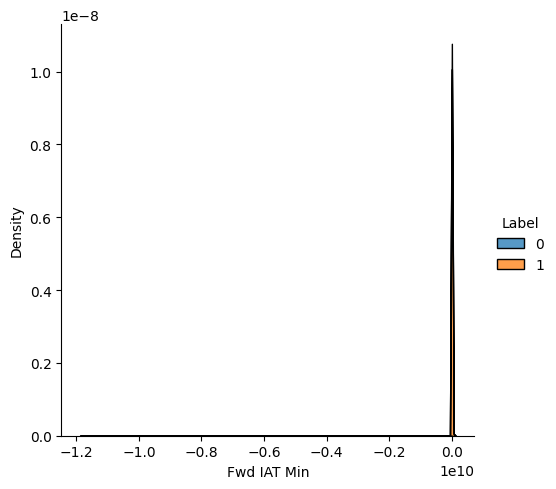

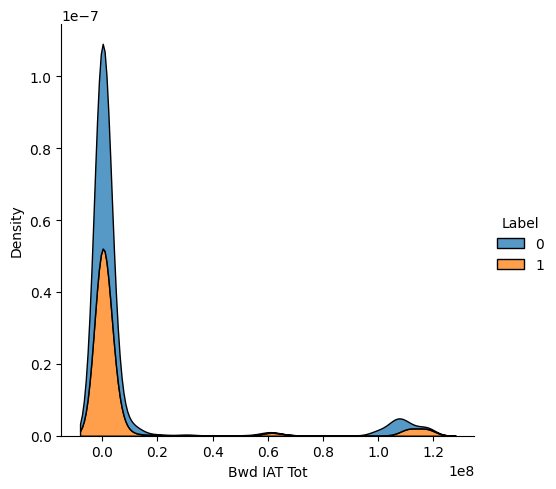

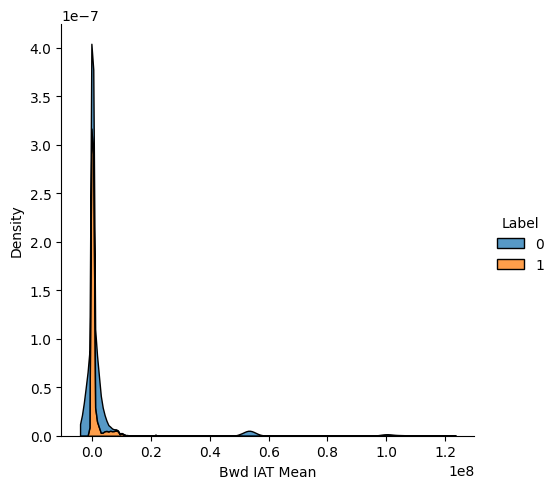

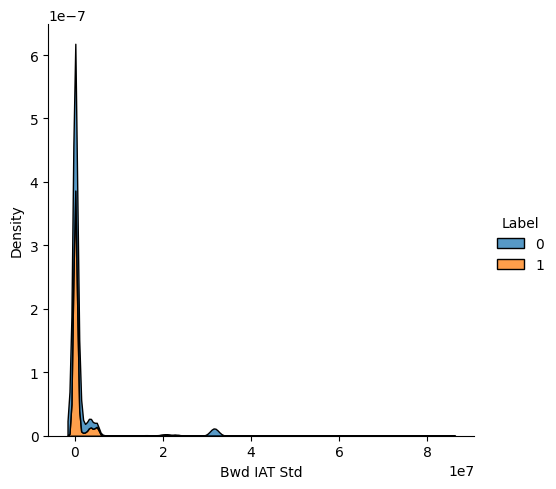

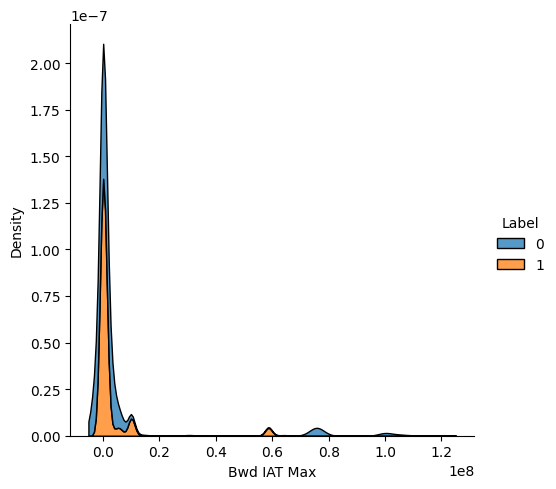

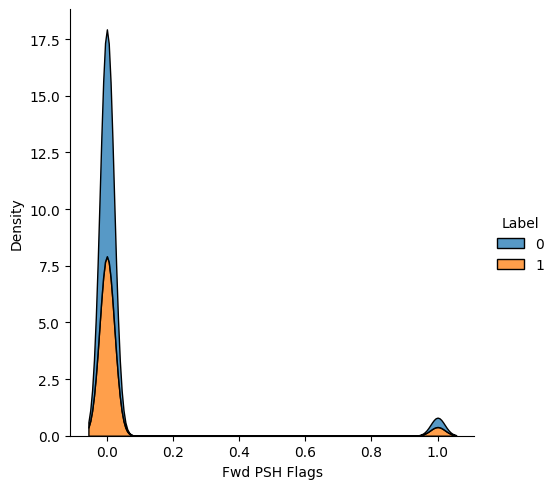

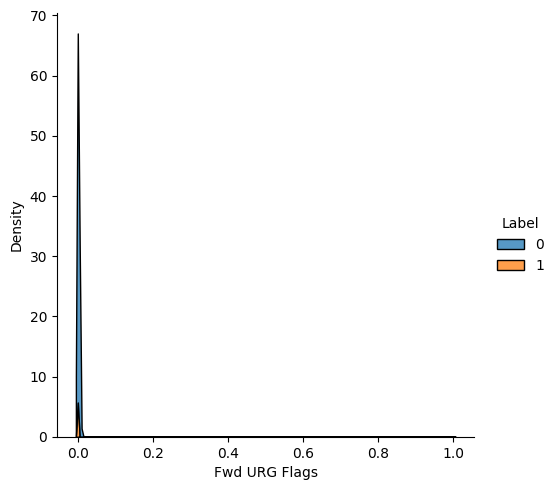

In [77]:
sns.displot(final_dataset, x="Flow IAT Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Flow IAT Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Flow IAT Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd IAT Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Tot", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd PSH Flags", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd URG Flags", hue="Label", kind="kde", multiple="stack")

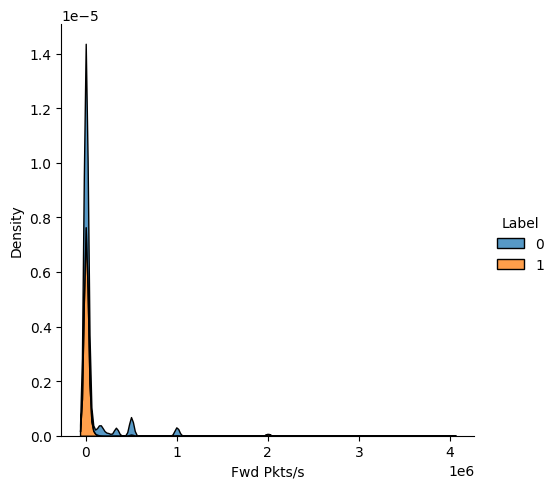

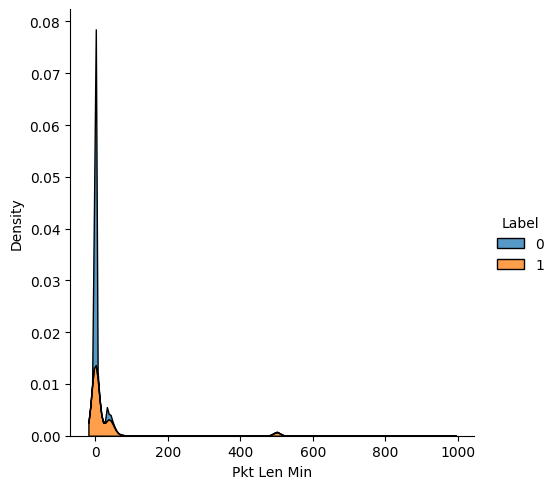

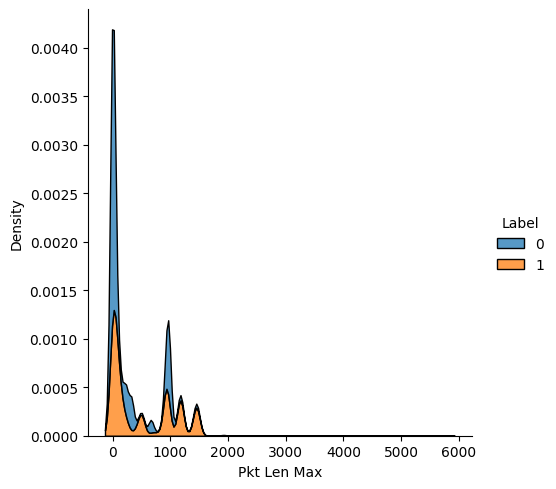

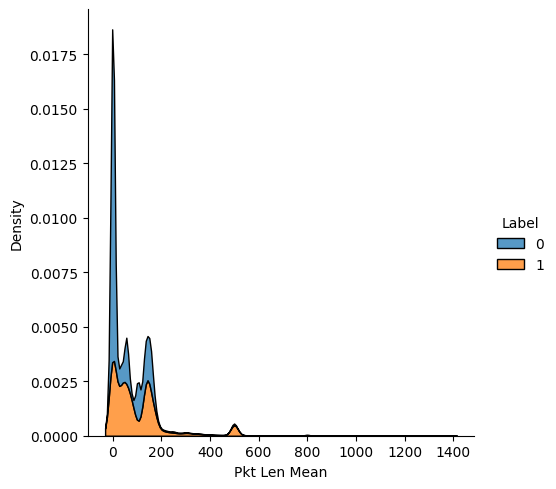

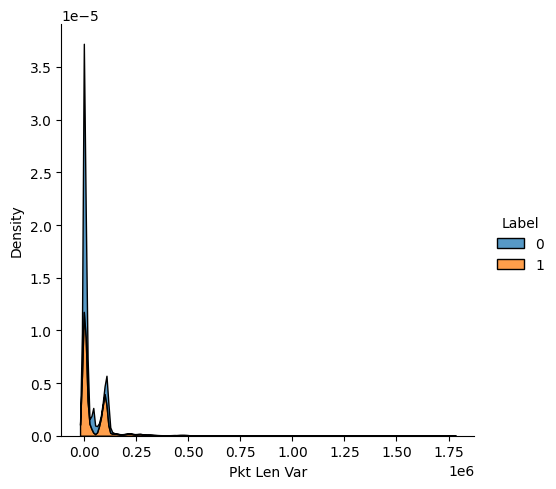

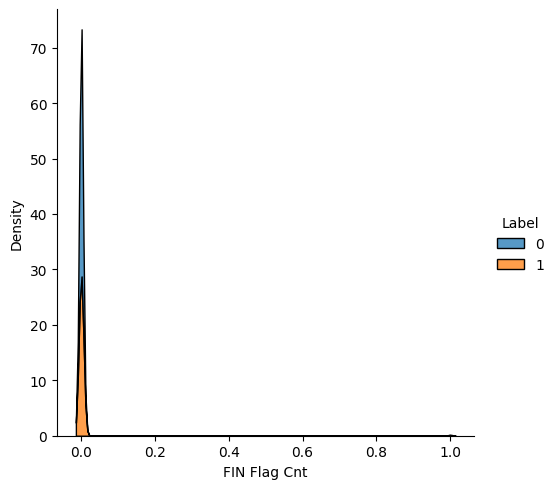

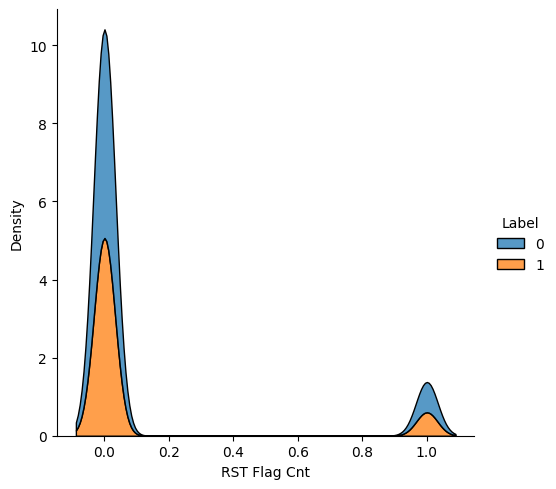

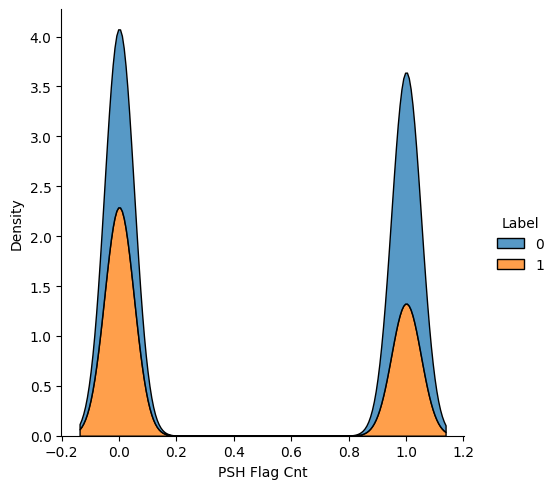

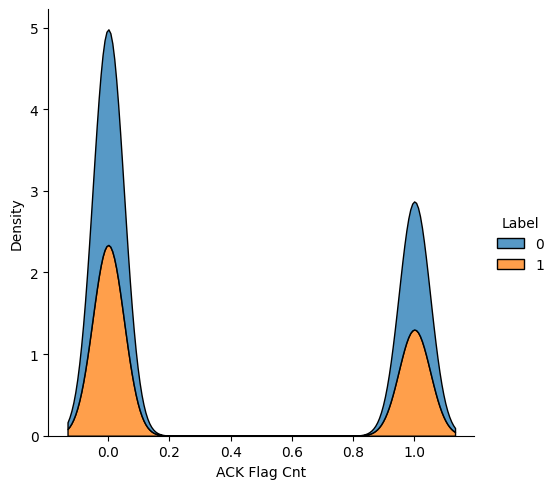

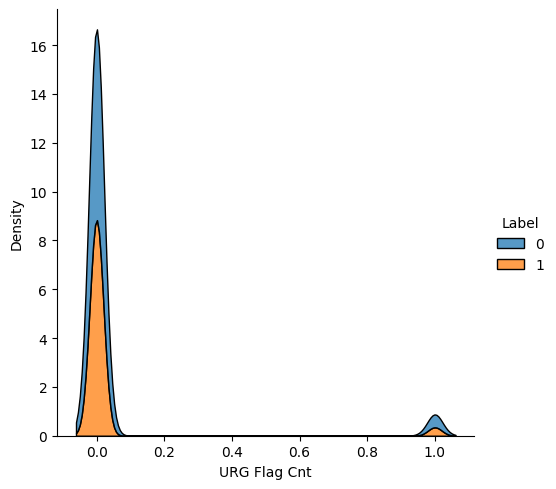

In [78]:
sns.displot(final_dataset, x="Fwd Pkts/s", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Var", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="FIN Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="RST Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="PSH Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="ACK Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="URG Flag Cnt", hue="Label", kind="kde", multiple="stack")

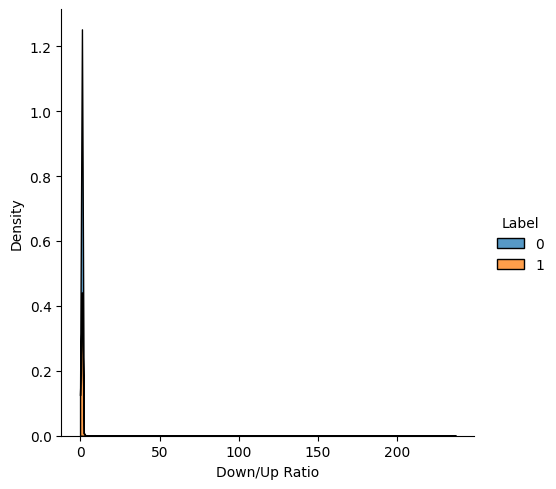

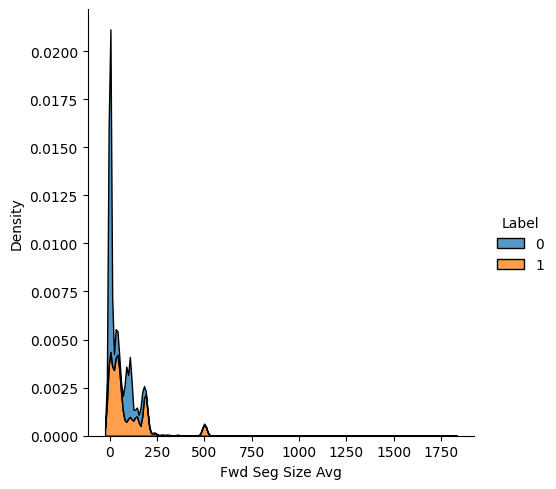

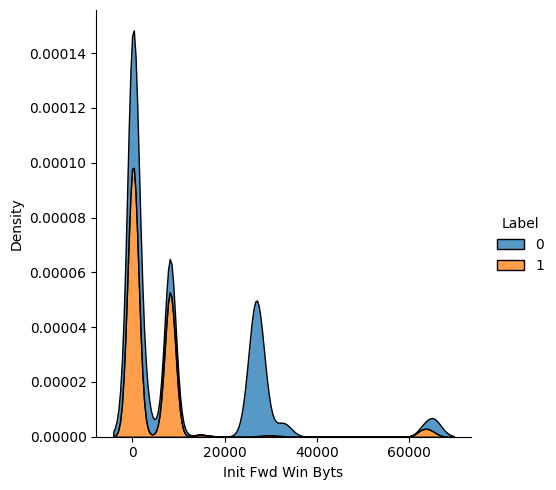

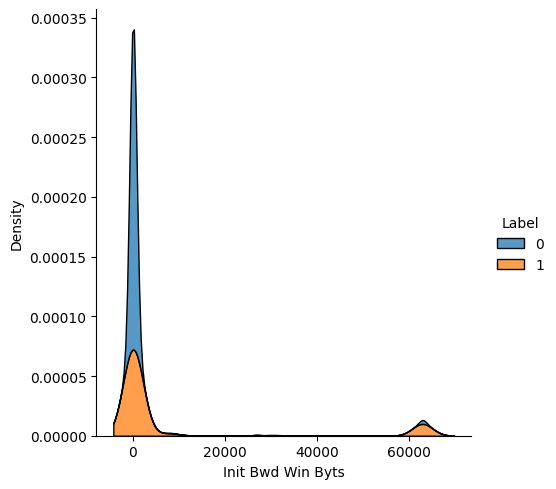

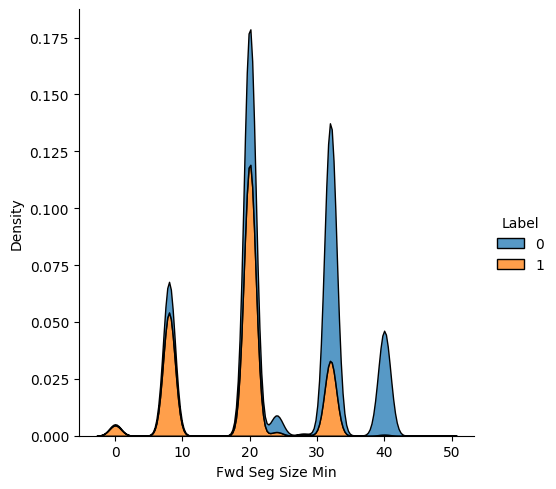

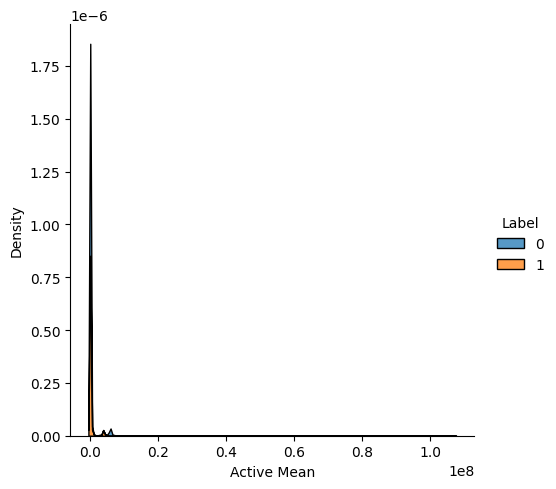

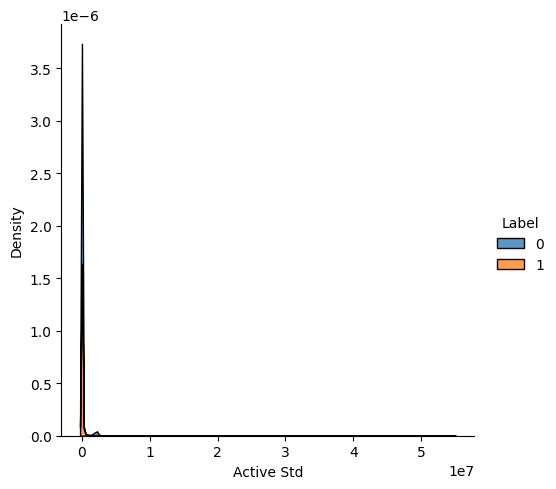

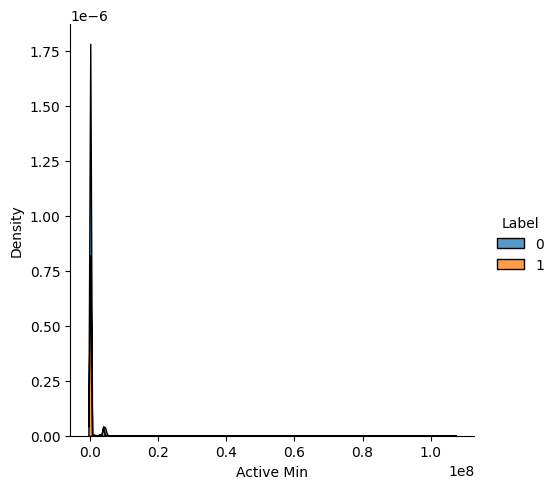

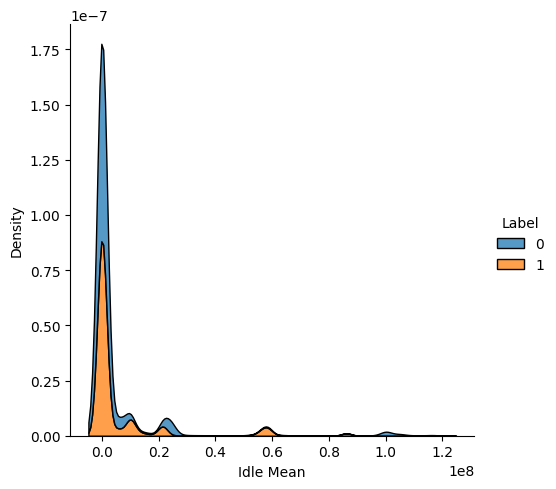

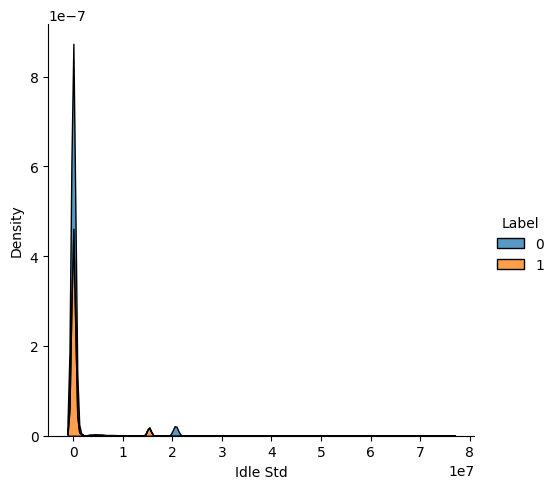

In [79]:
sns.displot(final_dataset, x="Down/Up Ratio", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Seg Size Avg", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Init Fwd Win Byts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Init Bwd Win Byts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Seg Size Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Idle Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Idle Std", hue="Label", kind="kde", multiple="stack")